###  Importando librerías a utilizar

In [2]:
import numpy as np 
import pandas as pd
from datetime import datetime, timedelta

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Cargando base de datos

In [3]:
df=pd.read_csv('HOOD.csv', sep=';')

### Transformando la variable "date" a formato "datetime"

In [4]:
df['date'] = pd.to_datetime(df['date'])
df

,date,close_last,volume,open,high,low
0,2022-08-19,9.26,13783770,9.85,9.88,9.19
1,2022-08-18,10.17,9525442,10.33,10.42,9.94
2,2022-08-17,10.42,9287033,10.75,10.82,10.31
3,2022-08-16,10.90,20413430,11.03,11.59,10.62
4,2022-08-15,11.01,7086896,10.79,11.19,10.79
...,...,...,...,...,...,...
263,2021-08-04,70.39,175790500,54.45,85.00,54.40
264,2021-08-03,46.80,93819200,37.91,48.59,37.16
265,2021-08-02,37.68,19948530,35.97,37.98,35.30
266,2021-07-30,35.15,40632230,34.93,36.98,33.25


### Reorganizando la serie  por fecha, en orden ascendente

In [5]:
df= df.sort_values(by="date",ascending=True)
df

,date,close_last,volume,open,high,low
267,2021-07-29,34.82,102474700,38.00,40.25,33.35
266,2021-07-30,35.15,40632230,34.93,36.98,33.25
265,2021-08-02,37.68,19948530,35.97,37.98,35.30
264,2021-08-03,46.80,93819200,37.91,48.59,37.16
263,2021-08-04,70.39,175790500,54.45,85.00,54.40
...,...,...,...,...,...,...
4,2022-08-15,11.01,7086896,10.79,11.19,10.79
3,2022-08-16,10.90,20413430,11.03,11.59,10.62
2,2022-08-17,10.42,9287033,10.75,10.82,10.31
1,2022-08-18,10.17,9525442,10.33,10.42,9.94


### Graficando el comportamiento del valor de las acciones de Robin Hood, donde se aprecia un desplome en el valor de sus acciones. Una clara tendencia a la baja.

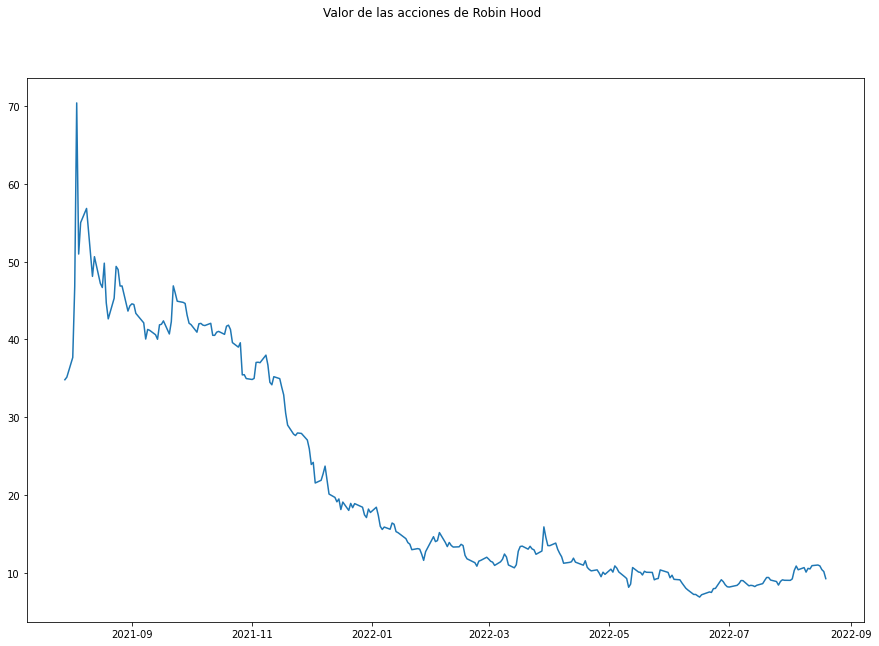

In [6]:
from matplotlib.pyplot import figure
figure(figsize=(15,10))
plt.suptitle('Valor de las acciones de Robin Hood')
plt.plot('date', 'close_last', data=df )
plt.show()

In [7]:
pip install pycaret-ts-alpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 468 kB 7.8 MB/s 
     |████████████████████████████████| 6.5 MB 81.8 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
     |████████████████████████████████| 3.3 MB 48.5 MB/s 
     |████████████████████████████████| 79.9 MB 1.1 MB/s 
     |████████████████████████████████| 303 kB 82.6 MB/s 
     |████████████████████████████████| 11.2 MB 47.5 MB/s 
     |████████████████████████████████| 69 kB 8.2 MB/s 
     |████████████████████████████████| 134 kB 112.8 MB/s 
     |████████████████████████████████| 2.0 MB 60.1 MB/s 
     |████████████████████████████████| 1.8 MB 46.7 MB/s 
     |████████████████████████████████| 1.6 MB 66.9 MB/s 
     |████████████████████████████████| 957 kB 99.5 MB/s 
     |████████████████████████████████| 34.5 MB 77.0 MB/s 
     |████████████████████████████████| 9.8 MB 62.7 MB/s 
  Created wheel for pyod: filenam

In [22]:
from pycaret.time_series import *

### Creando nuevo data frame, pero solo con las variables a utilizar para realizar la predicción de la serie temporal

In [23]:
series=df[['date', 'close_last']]

### Fijando la variable "date"

In [24]:
series=series.set_index('date')

In [25]:
series=series.asfreq('D',method='pad')

In [92]:
exp = setup(data = series,session_id = 123, fh=90, fold=3)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: e75b
INFO:logs:self.variable_keys: {'n_jobs_param', 'gpu_param', 'variable_keys', 'fh', '_ml_usecase', 'X_test_transformed', '_available_plots', 'y_train_transformed', 'exp_id', 'index_type', 'pipeline', '_all_models_internal', 'X', 'y_train', 'experiment__', 'fold_groups_param_full', 'y', 'idx', 'X_transformed', 'exp_name_log', 'y_test', 'enforce_pi', 'fold_generator', 'y_test_transformed', 'log_plots_param', '_all_metrics', 'seasonality_present', 'primary_sp_to_use', 'master_model_container', 'approach_type', 'display_container', 'seasonal_period', 'all_sp_values', 'USI', 'enforce_exogenous', 'logging_param', 'memory', 'X_train_transformed', '_gpu_n_jobs_param', 'strictly_positive', 'data', 'html_param', 'X_test', 'seed', 'y_transformed', 'exogenous_present', '_all_models', 'X_train', '

,Description,Value
0,session_id,123
1,Target,close_last
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(387, 1)"
5,Train data shape,"(297, 1)"
6,Test data shape,"(90, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 0.21s...............


### Resumen Estdaístico con pycaret

In [93]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,387.0
1,Summary,Statistics,Actual,Mean,,21.425142
2,Summary,Statistics,Actual,Median,,13.5
3,Summary,Statistics,Actual,Standard Deviation,,14.357739
4,Summary,Statistics,Actual,Variance,,206.144675
5,Summary,Statistics,Actual,Kurtosis,,-0.664117
6,Summary,Statistics,Actual,Skewness,,0.882103
7,Summary,Statistics,Actual,# Distinct Values,,249.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",7814.106405
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",13068.348737


### Generando gráfico de la serie temporal, particionada en muestra test y muestra train

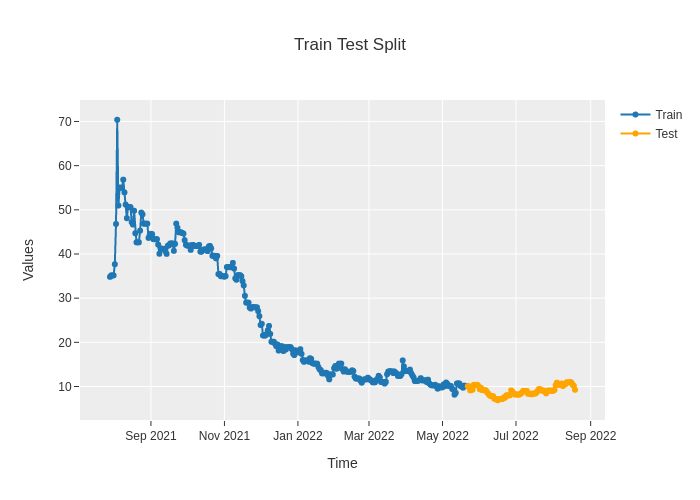

INFO:logs:Visual Rendered Successfully


In [94]:
plot_model(plot = 'train_test_split', )

### Descomponiendo la serie temporal de manera aditiva.

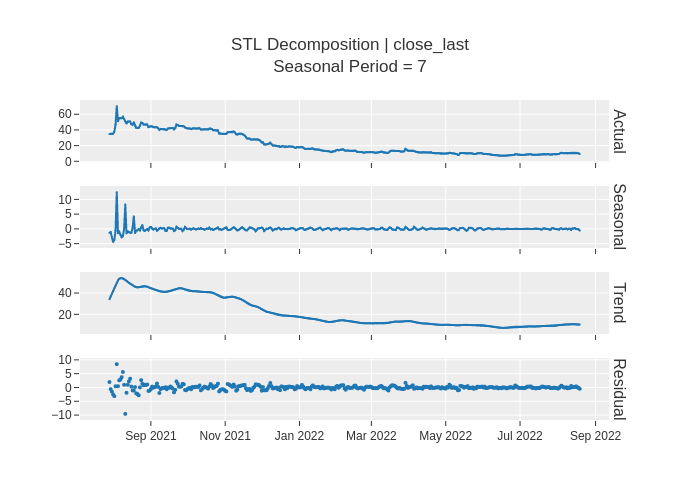

INFO:logs:Visual Rendered Successfully


In [70]:
plot_model(plot = 'decomp_stl')

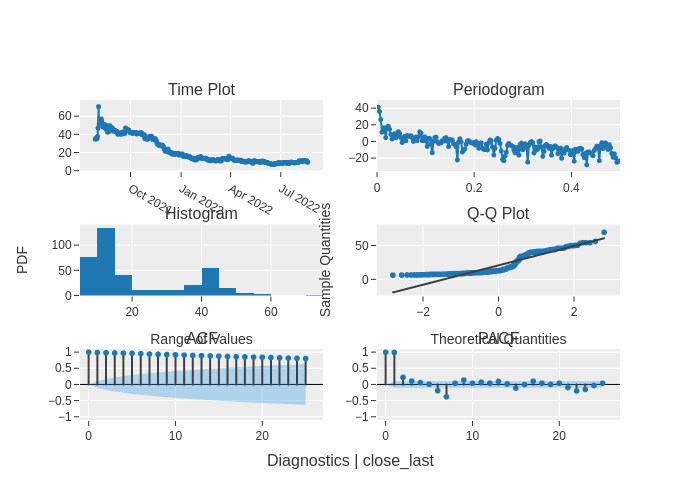

INFO:logs:Visual Rendered Successfully


In [71]:
plot_model(plot = 'diagnostics')

### Creando el modelo ARIMA con pycaret, donde se aprecia que el valor del error cuadrático medio es mucho más elevado con respecto al modelo de deep learning

In [95]:
model=create_model('arima')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2021-08-24,25.8002,29.8601,0.6948,0.4709,2.7517,2.5902,-44.3796
1,2021-11-22,6.5914,7.0842,0.4338,0.3417,1.7205,1.2554,-1.5663
2,2022-02-20,4.2813,4.8084,0.3840,0.5166,1.4839,1.0797,-11.4282
Mean,NaT,12.2243,13.9176,0.5042,0.4430,1.9854,1.6418,-19.1247
SD,NaT,9.6458,11.3113,0.1363,0.0741,0.5504,0.6744,18.3061


INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:ARIMA(seasonal_order=(0, 1, 0, 7))
INFO:logs:create_model() successfully completed......................................


### Realizando predicciones con el modelo ARIMA, con un intervalo de confianza del 90%. Entonces, con un 90% de probabilidad, se puede decir que el valor de las acciones de Robin Hood contianuarán perdiendo valor, incluso pudiese ser posible que pudiesen fluctuar entre cero y más de 35 dólares por acción, por tanto, es posible que la empresa pudiese entrar en quiebra.

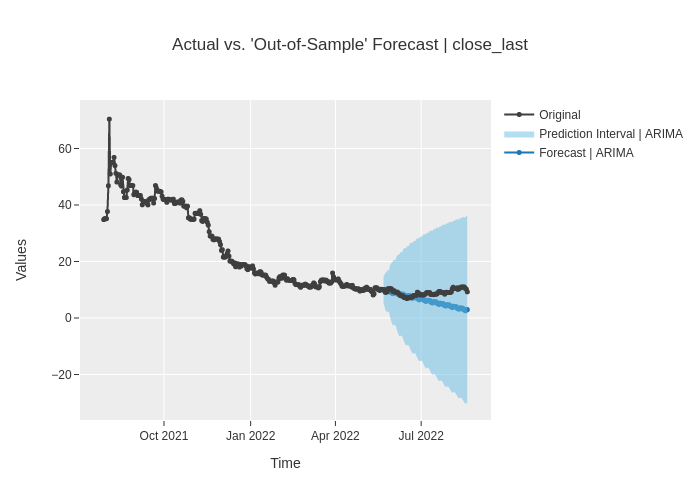

INFO:logs:Visual Rendered Successfully


In [96]:
plot_model(model, plot = 'forecast', data_kwargs = {'fh' : 90}, )

### Predicciones de los próximos 3 meses del valor de las acciones de Robin Hood, donde se puede constatar el desplome del valor de sus acciones, estando inlcuso muy cercano a los 4 dólares por valor de cada acción.

In [97]:
predict_model(finalize_model((model),{'fh':[90]}))

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7f1891e05ed0>, estimator=ARIMA(seasonal_order=(0, 1, 0, 7)), fit_kwargs={'fh': [90]}, groups=None, model_only=True, experiment_custom_tags=None, display=None)
INFO:logs:Finalizing ARIMA(seasonal_order=(0, 1, 0, 7))
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7f1891e05ed0>, estimator=ARIMA(seasonal_order=(0, 1, 0, 7)), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={'fh': [90]}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untraine

,y_pred
2022-08-20,9.5095
2022-08-21,9.7092
2022-08-22,9.9489
2022-08-23,9.9667
2022-08-24,9.5890
...,...
2022-11-13,4.4378
2022-11-14,4.7200
2022-11-15,4.7718
2022-11-16,4.4213
